## Week 4 Section
Joshua Park 10/4/24

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# test sequences
X = 'TAACGGCCCATCTCGAT'
Y = 'TTATCTCTATGTGCGA'

### Global Alignment
Write a function to return the global alignment score matrix and the global alignment score for sequences X and Y given the following:\
\
match: +1\
insertion/deletion: -1\
AG mismatch or CT mismatch: -0.5\
other mismatch: -1

In [156]:
def match_score(x, y):
    if x == y:
        return 1
    elif x.capitalize()+y.capitalize() in ['AG','GA','CT','TC']:
        return -0.5
    return -1
        
    
def align_global(X, Y, gap_pen = -1):

    L = len(X)
    M = len(Y)

    ### initialization
    S = np.empty( (L+1,M+1) )

    S[0,0] = 0
    S[1:,0] = [gap_pen * (i+1) for i in range(L)] # appropriate gap penalty for starting several nucleotides in from start of sequence
    S[0,1:] = [gap_pen * (i+1) for i in range(M)] # appropriate gap penalty for starting several nucleotides in from start of sequence

    ### recursion
    for i in range(L):
        for j in range(M):
            insert = S[i+1][j] + gap_pen
            delete = S[i][j+1] + gap_pen
            match = S[i][j] + match_score(X[i],Y[j])

            S[i+1][j+1] = np.max([insert, delete, match])

    ### termination
    return S, S[L, M]

Alignment score is: 2.0


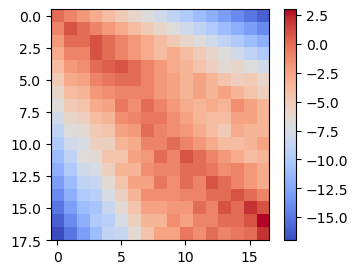

In [157]:
S, s = align_global(X, Y)
print('Alignment score is: ' + str(s))

fig, ax = plt.subplots(figsize=(4, 3))
cax = ax.imshow(S, cmap='coolwarm')
fig.colorbar(cax)
plt.show()

### Local Alignment
Modify the above function to align locally

In [148]:
def align_local(X, Y, gap_pen = -1):

    L = len(X)
    M = len(Y)
    
    ### initialization
    S = np.empty( (L+1,M+1) )

    S[0,0] = 0
    S[1:,0] = 0     # change initialization to allow alignment to start anywhere along X
    S[0,1:] = 0     # change initialization to allow alignment to start anywhere along Y

    ### recursion
    for i in range(L):
        for j in range(M):
            insert = S[i+1][j] + gap_pen
            delete = S[i][j+1] + gap_pen
            match = S[i][j] + match_score(X[i],Y[j])

            S[i+1][j+1] = np.max([0, insert, delete, match])     # allow alignment to start anywhere

    ### termination
    return S, np.max(S)    #change to allow alignment to end anywhere

Maximum alignment score is: 6.0


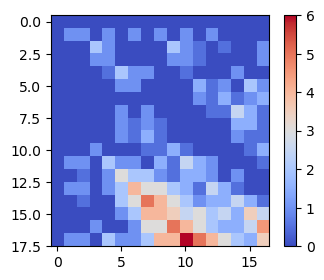

In [149]:
S, s = align_local(X, Y)
print('Maximum alignment score is: ' + str(s))

fig, ax = plt.subplots(figsize=(4, 3))
cax = ax.imshow(S, cmap='coolwarm')
fig.colorbar(cax)
plt.show()

### Traceback
For the global alignment case, modify the function to also return the alignments. Report the alignments as a string for each sequence with a '-' inserted where corresponding insertions/deletions occur.

In [153]:
def align_global_traceback(X, Y, gap_pen = -1):

    L = len(X)
    M = len(Y)
    
    S = np.empty( (L+1,M+1) )  # scores
    T = np.empty( (L,M) , dtype = int)      # states (whether you reach i, j by insertion (0), deletion (1), or match (2))
    

    ### initialization
    S[0,0] = 0
    S[1:,0] = [gap_pen * (i+1) for i in range(L)]
    S[0,1:] = [gap_pen * (i+1) for i in range(M)]
    
    ### recursion
    for i in range(L):
        for j in range(M):
            insert = S[i+1][j] + gap_pen
            delete = S[i][j+1] + gap_pen
            match = S[i][j] + match_score(X[i],Y[j])

            S[i+1][j+1] = np.max([insert, delete, match])
            T[i][j] = np.argmax([insert, delete, match]) #keep track of states for traceback

    ### termination
    x, y = traceback(X, Y, T)
    
    return S, x, y

def traceback(X, Y, states):
'''
Starts at end of alignment and reconstructs it backwards.
'''
    x = '' #alignment string for X
    y = '' #alignment string for Y

    #Start at end of sequences/state matrix
    i = len(X)-1
    j = len(Y)-1

    while i >= 0 and j >= 0:
        if states[i,j] == 0:     # if insert
            x = '-' + x
            y = Y[j] + y
            j -= 1
        elif states[i,j] == 1:   # if delete
            x = X[i] + x
            y = '-' + y
            i -= 1
        elif states[i,j] == 2:   # if match
            x = X[i] + x
            y = Y[j] + y
            i -= 1
            j -= 1
    return x, y

In [154]:
S, x, y = align_global_traceback(X, Y)
print(x + '\n' + y)

TAACGGCCC-ATCT-CGAT
TTAT--CTCTATGTGCGA-
